In [ ]:
# First we obtain our data and seprate our x and y sets

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')
X, y = dataset['X'], dataset['y']
n, p = np.shape(X)
X = np.hstack((np.ones((n,1)), X))

In [ ]:
# lets just run only on our test data, to ensure that everything is working correclty, before we begin cross validation

In [12]:
# obtain our random starts
q = np.shape(y)[1]
M = 1
V = np.random.randn(M+1, q);
W = np.random.randn(p+1, M);
alpha = 0.05 #step size
L = 100 #number of epochs
e = []
accuracy = []

#logsig activation function
def logsig(_x):
    return 1/(1+np.exp(-_x))

# Begin our epochs
for epoch in range(L):
    e.append(epoch)
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = logsig(np.hstack((np.ones((1,1)), X[[i],:]@W)))
        Yhat = logsig(H@V)
        # Backpropagate
        delta = (Yhat-y[[i],:])*Yhat*(1-Yhat)
        Vnew = V-alpha*H.T@delta
        gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
        Wnew = W- alpha*X[[i],:].T@gamma
        V = Vnew
        W = Wnew
    print('epoch: ', epoch)
    H = logsig(np.hstack((np.ones((n,1)), X@W)))
    Yhat = logsig(H@V)  # our calculated values
    prediction = []
    
    # check our accuracy per each epoch
    for i in range(len(Yhat)):
        if Yhat[i] > 0.5:
            prediction.append([1])
        else:
            prediction.append([-1])
    num_incorrect = np.sum(prediction != y)
    accuracy.append(num_incorrect / len(y))

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

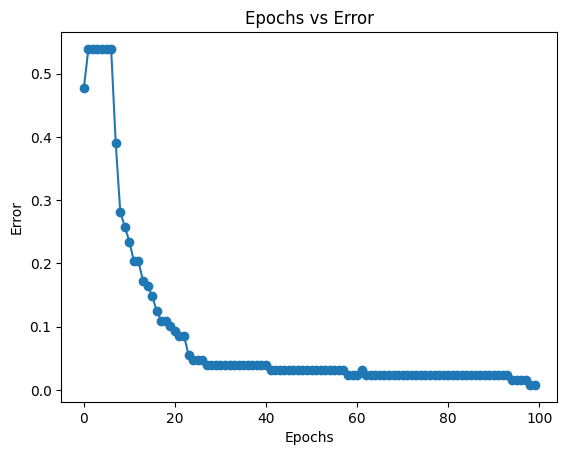

In [13]:
# plot it
plt.plot(e, accuracy, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error')
plt.show()

In [ ]:
# We can see above that after many epochs, we get a near 0 error, which is about what you would expect, so now we can move onto cross validation to
# get a much more realistic effort

In [18]:
# same as before
q = 1
M = 1
V = np.random.randn(M+1, q);
W = np.random.randn(10, M);
alpha = 0.05 #step size
L = 100 #number of epochs
e = []
accuracy = []
avg_accuracy = []

#logisg function
def logsig(_x):
    return 1/(1+np.exp(-_x))

# start our epochs
for epoch in range(L):
    accuracy = []
    e.append(epoch)
    # for each epoch, we want to split our data set up into the 8 different possible ways, with training data, and then hold out test data
    for i in range(8):
        start = i * 16
        end = (i+1) * 16
        X_train = np.concatenate((X[:start, :], X[end:, :]), axis=0)
        y_train=np.concatenate((y[:start, :], y[end:, :]), axis=0)
        X_test=X[start:end, :]
        y_test=y[start:end, :]
        n, p = np.shape(X_train)
        ind = np.random.permutation(n)
        
        # continue the same as before
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), X_train[[i],:]@W)))
            Yhat = logsig(H@V)
            # Backpropagate
            delta = (Yhat-y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W- alpha*X_train[[i],:].T@gamma
            V = Vnew
            W = Wnew
        # calculate our prediction and our error for this given round of data
        H = logsig(np.hstack((np.ones((16,1)), X_test@W)))
        Yhat = logsig(H@V)
        prediction = []
        for i in range(len(Yhat)):
            if Yhat[i] > 0.5:
                prediction.append([1])
            else:
                prediction.append([-1])
        num_incorrect = np.sum(prediction != y_test)
        accuracy.append(num_incorrect / len(y_test))
    # obtain the accuracy if this epoch
    print('epoch: ', epoch)
    avg_accuracy.append(np.mean(accuracy))

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

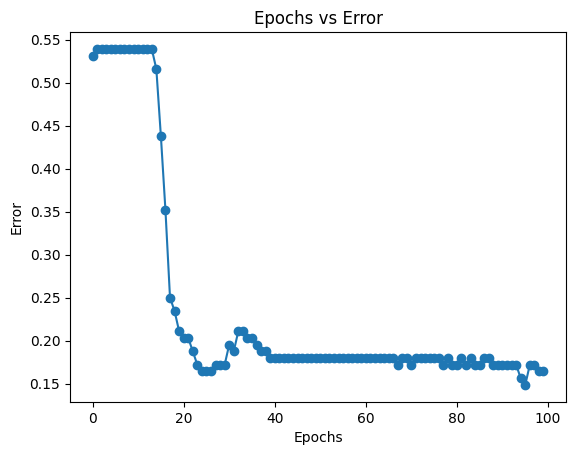

In [19]:
# plot it
plt.plot(e, avg_accuracy, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error')
plt.show()

In [ ]:
 # We can then see here that our model will eventually level out at around 15% error for the testing data, and we can see that no matter how many
 # epochs or the step size we try, that we can never actually get a 0% error rate, or even close. This can be considered an alright issue to have
 # as now we do not have to worry about overfitting data, and we can adjust our model accordingly